# 클러스터링
1. K Means - 중심점 옮겨가며 계속 테스트하다가, 더이상 움직이지 않을때 정지
2. 병합 군집 - 하나씩 가까운 것 묶기
3. DBSCAN - 거리와 최소개수를 세팅하여 스스로 군집갯수를 만드는것

In [1]:
import mglearn

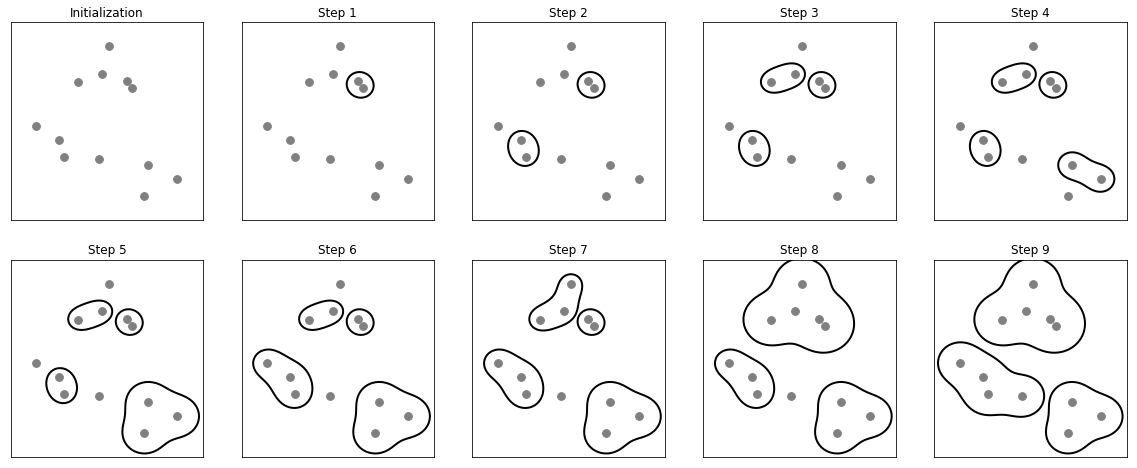

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

In [3]:
# 병합군집
from sklearn.cluster import AgglomerativeClustering # Agglomerative
from sklearn.datasets import make_blobs # 교육용 데이터를 만들어줌

In [4]:
x, y = make_blobs() #실습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [10]:
model = AgglomerativeClustering(n_clusters=5)

In [11]:
p = model.fit_predict(x)

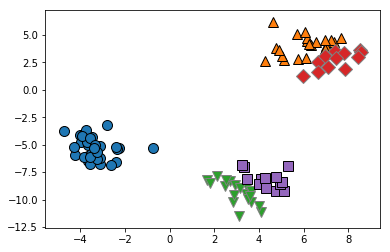

In [12]:
mglearn.discrete_scatter(x[:,0], x[:,1], p)

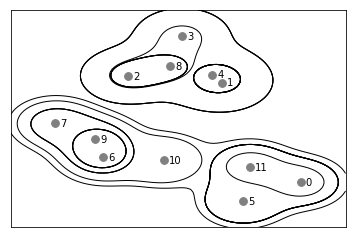

In [13]:
mglearn.plots.plot_agglomerative()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


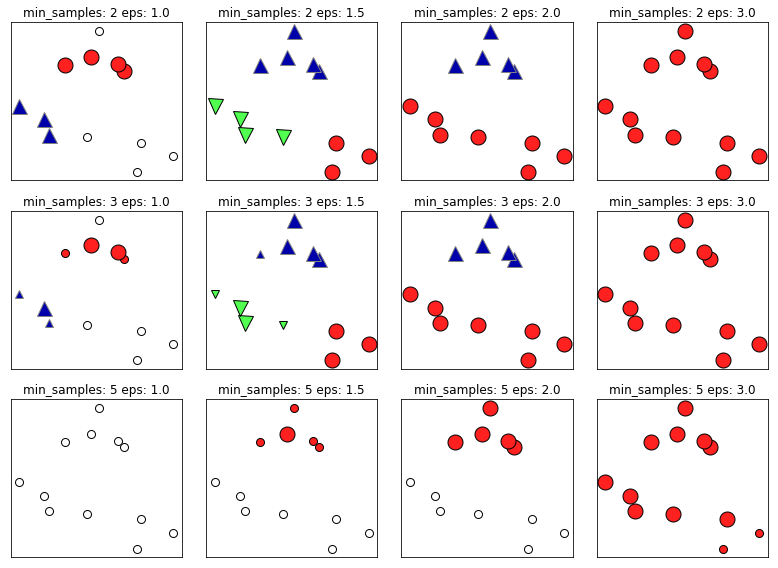

In [14]:
mglearn.plots.plot_dbscan()

In [15]:
from sklearn.cluster import DBSCAN

In [22]:
# min_samples는 클러스터가 되기 위한 최소 샘플수
# eps는 클러스터가 되기 위한 샘플간의 거리
dbscan_predict = DBSCAN(eps=1.5, min_samples=10).fit_predict(x) # 군집의 갯수를 정해주지 않는다. 

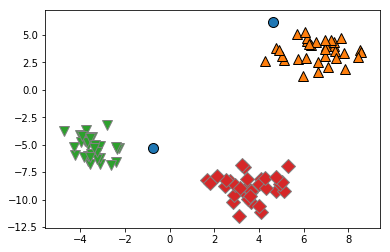

In [23]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], dbscan_predict)

# Bank Marketing Data Set  1
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances:45211
Number of Attributes:17

상품에 가입한 사람과 가입하지 않은 사람들을 미리 예측할 수 있을까

In [103]:
import pandas as pd

In [104]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [105]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [106]:
(bank['y']=='yes').mean()

0.11523999115239991

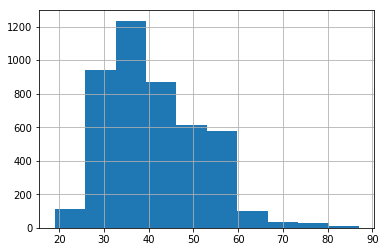

In [107]:
bank['age'].hist()

In [108]:
bank.isna().sum().sum()

0

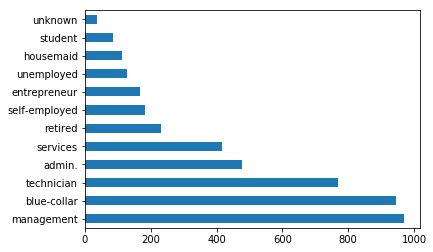

In [109]:
job = bank['job']
job.value_counts().plot.barh()

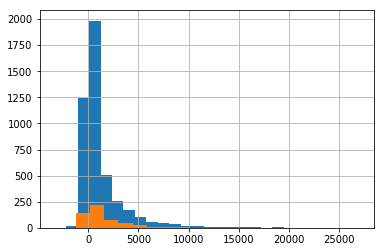

In [170]:
bank[bank.balance<20000].balance.hist(bins=20)
bank[bank.y=='yes'].balance.hist(bins=20)

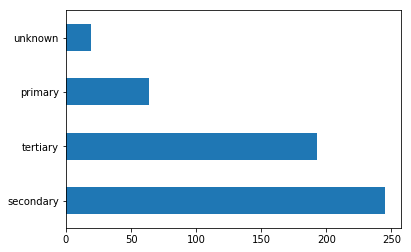

In [171]:
bank[bank.y =='yes'].education.value_counts().plot.barh()

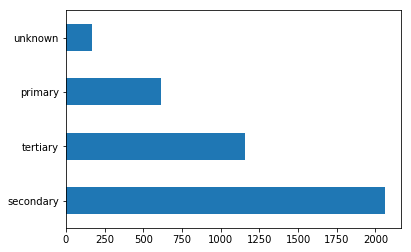

In [174]:
bank[bank.y =='no'].education.value_counts().plot.barh()

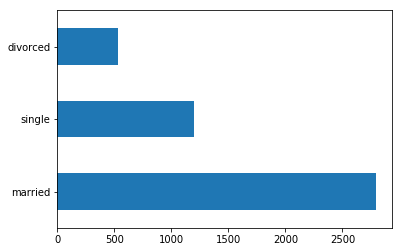

In [175]:
bank.marital.value_counts().plot.barh()

In [184]:
#bank_real_x = bank.iloc[:, :-1]
#bank_real_y = bank.iloc[:, -1]

#bank_real_x = pd.get_dummies(bank_real_x)
#bank_real_x.shape

bank_one_hot = pd.get_dummies(bank)

bank_real_x = bank_one_hot.iloc[:, :-2]
bank_real_y = bank.iloc[:, -2]

bank_real_y.head()

0    unknown
1    failure
2    failure
3    unknown
4    unknown
Name: poutcome, dtype: object

In [112]:
bank_real_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-n

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=2).fit(bank_real_x)

In [115]:
pca_x = pca.transform(bank_real_x)

In [116]:
pca_x.shape

(4521, 2)

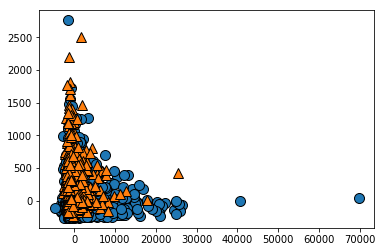

In [117]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], bank_real_y)

1. K Means - 중심점 옮겨가며 계속 테스트하다가, 더이상 움직이지 않을때 정지

In [118]:
from sklearn.cluster import KMeans

In [119]:
km = KMeans(n_clusters=2).fit(pca_x) #x를 3개로 그룹화

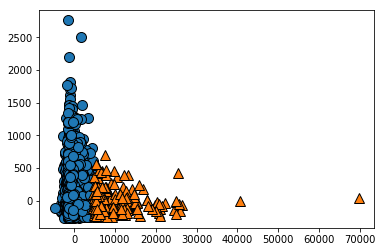

In [120]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], km.predict(pca_x))

2. 병합 군집 - 하나씩 가까운 것 묶기

In [121]:
from sklearn.cluster import AgglomerativeClustering # Agglomerative

In [122]:
ag = AgglomerativeClustering(n_clusters=2)

In [123]:
ag_predict = ag.fit_predict(pca_x)

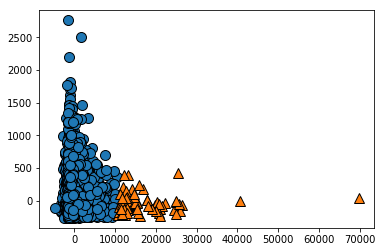

In [124]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], ag_predict)

3. DBSCAN - 거리와 최소개수를 세팅하여 스스로 군집갯수를 만드는것

In [125]:
from sklearn.cluster import DBSCAN

In [126]:
dbscan_predict = DBSCAN(eps=1.5, min_samples=10).fit_predict(pca_x)

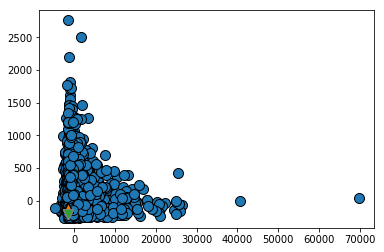

In [127]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], dbscan_predict)

# Bank Marketing Data Set  2
결정트리

In [128]:
# 결정 트리 학습
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [180]:
tree = DecisionTreeClassifier().fit(bank_real_x, bank_real_y)

In [181]:
importance = pd.DataFrame(tree.feature_importances_, x.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

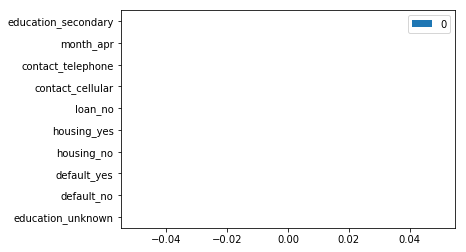

In [182]:
p = importance.sort_values(by=0).head(10).plot.barh()

In [147]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9203539823008849, 0.8956675508399646)

In [162]:
# 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='bank.dot', class_names=bank_real_y ,#['yes', 'no'], 
                 feature_names=bank_real_x.columns, impurity=False, filled=True)

In [163]:
#설치 필요
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

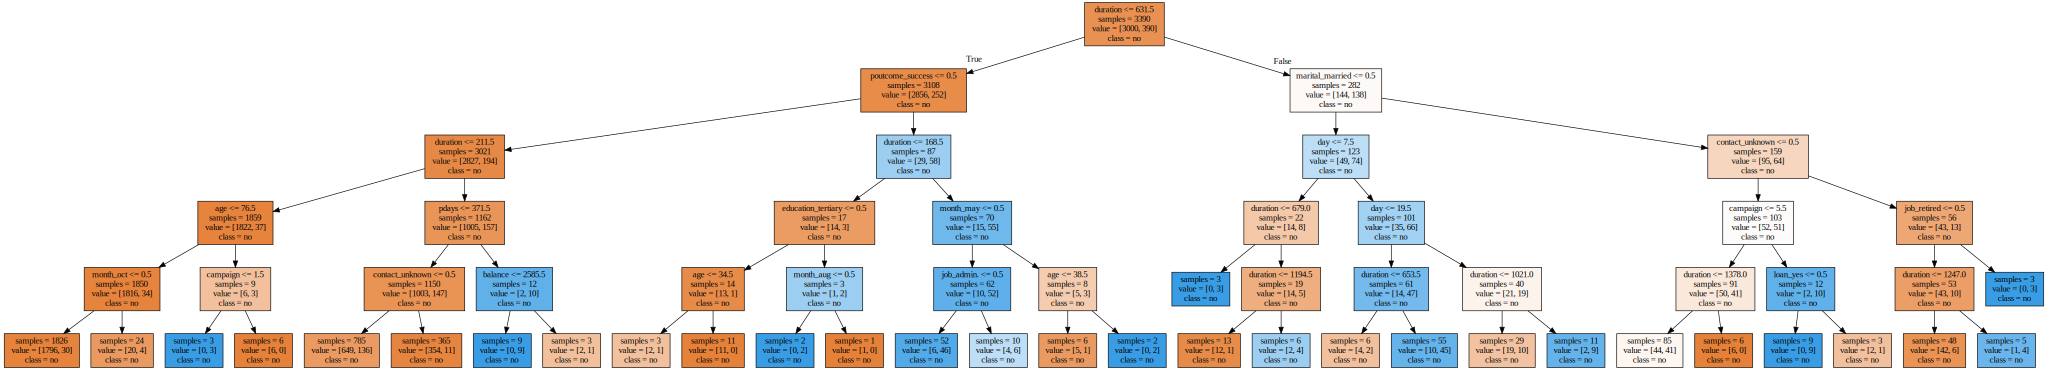

None

In [164]:
import graphviz
with open('bank.dot') as f:
    bank_graph = f.read()
g = display(graphviz.Source(bank_graph))
display(g)